# Comparison of carriers by flight cancellations in US
## by Vladimir Ploshay

## Investigation Overview

> In the investigation below, I wanted to compare flight cancellations across airline companies operating in US.

## Dataset Overview

> Full Dataset contains information about flights in United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. I my exploration I use only the last year of the dataset - year 2008. There are about 7 mln. observations and 30 features in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2008 = pd.read_csv('2008.csv')
df_carrier = pd.read_csv('carriers.csv')
df_2008 = pd.merge(df_2008,df_carrier, left_on='UniqueCarrier',right_on='Code',suffixes=('_left', '_right'), how = 'left')
df_2008.drop(['Code'], axis=1, inplace=True)
all_flights = df_2008.groupby(['Description', 'Month', 'DayofMonth'])['Year'].count()
all_flights = all_flights.reset_index()
all_flights.rename({'Year': 'Flights'}, axis='columns', inplace=True)
cancelled_flights = df_2008.query('Cancelled==1').groupby(['Description', 'Month', 'DayofMonth'])['Year'].count()
cancelled_flights = cancelled_flights.reset_index()
cancelled_flights.rename({'Year': 'Flights'}, axis='columns', inplace=True)

## Distribution of cancelled flights by carrier

> Flights distributions is multimodal. One peak is about 700 flights per day and other peak is around 1500 flights. Most of points on the histogram lie between 300 and 1800 flights. 
Cancelled flights have a unimodal distribution. There are almost the same quantity of points between 3 and 100 cancelled flights. More than 300 cancellations by company per day is a rare event.

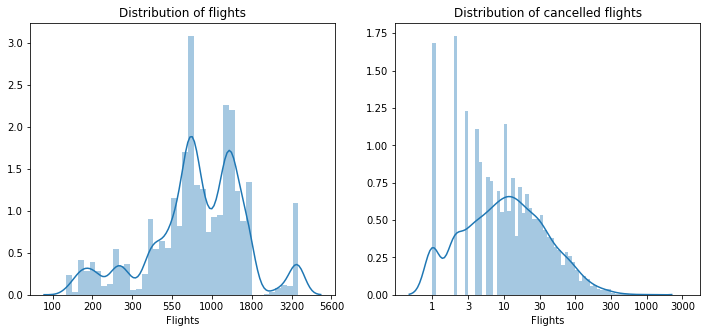

In [3]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3


plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.title('Distribution of flights')
bins=np.arange(0,3700,50)
a = pd.DataFrame(df_2008.groupby(['Description','Month','DayofMonth'])['Year'].count())
a = a.reset_index()
a.rename(columns={'Year':'Flights'}, inplace=True)
a['log_flights'] = a['Flights'].apply(log_trans)
sb.distplot(a['log_flights'])
plt.xlabel('Flights')
ticks=np.arange(2, 3.8, 0.25)
tick_labels= np.around(log_trans(np.arange(2, 3.8,0.25), inverse=True)).astype(int)
plt.xticks(ticks,[100,200,300,550,1000,1800,3200,5600]);

plt.subplot(1,2,2)
plt.title('Distribution of cancelled flights')
bins=np.arange(0, 3.6,0.05)
b = pd.DataFrame(df_2008.query('Cancelled==1').groupby(['Description','Month','DayofMonth'])['Year'].count())
b = b.reset_index()
b.rename(columns={'Year':'Flights'}, inplace=True)
b['log_flights'] = b['Flights'].apply(log_trans)
sb.distplot(b['log_flights'], bins=bins)
ticks=np.arange(0, 3.6, 0.5)
plt.xlabel('Flights')

tick_labels= np.around(log_trans(np.arange(0, 3.6,0.5), inverse=True)).astype(int)
plt.xticks(ticks,[1,3,10,30,100,300,1000,3000]);


## Flights vs. Distance

> With increasing distance both number of flights and number of cancelled flights are declining. This relationship isn't very strong, however, a visible one.

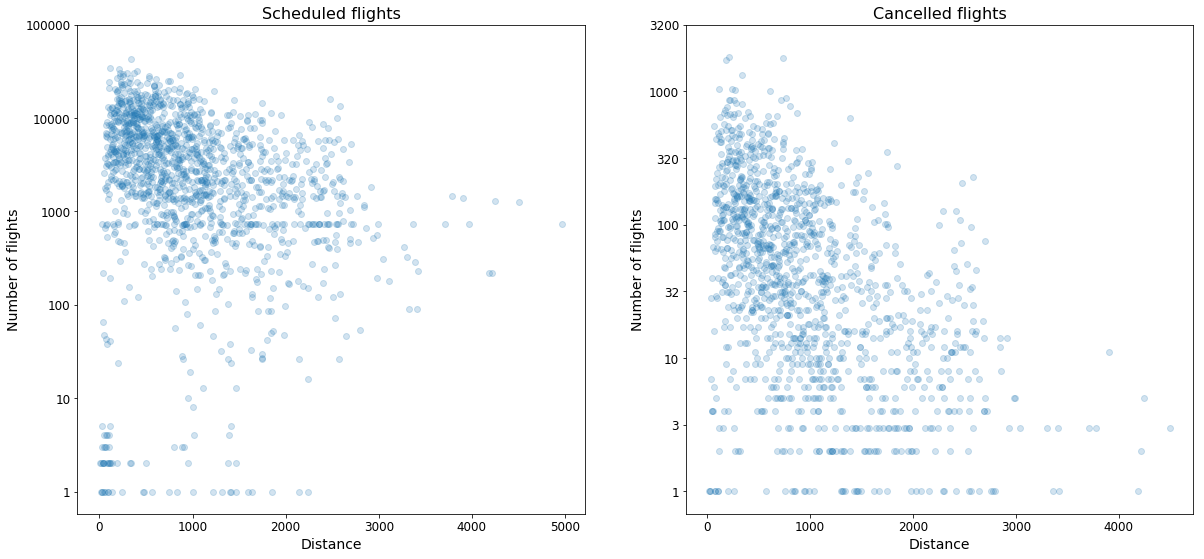

In [4]:
# I use scatter plot to compare number of cancelled flights by distance
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
a = df_2008.groupby('Distance')['Year'].count()
plt.scatter(a.index, log_trans(a.values), alpha=1/5)
ticks = [0,1,2,3,4,5]
tick_labels = log_trans([0,1,2,3,4,5], inverse=True)
plt.yticks(ticks, tick_labels, fontsize=12)
plt.xticks(fontsize=12)

plt.xlabel('Distance', fontsize=14)
plt.ylabel('Number of flights', fontsize=14)
plt.title('Scheduled flights', fontsize=16);

plt.subplot(1,2,2)
a = df_2008.query('Cancelled==1').groupby('Distance')['Year'].count()
plt.scatter(a.index, log_trans(a.values), alpha=1/5)
ticks = [0,0.5,1,1.5,2,2.5,3,3.5]
tick_labels = [1, 3, 10, 32, 100, 320, 1000, 3200]
plt.yticks(ticks, tick_labels, fontsize=12)
plt.xticks(fontsize=12)

plt.xlabel('Distance', fontsize=14)
plt.ylabel('Number of flights', fontsize=14)
plt.title('Cancelled flights', fontsize=16);

## Cancellation reason by carrier
> Carrier and weather are the main reasons for flight cancellations for most of the flights. In addition to this fact, all of airlines have different proportion of cancellations by reason. It's not so easy to make implications for a person who is planning to buy a ticket. For instance, if he or she is buying tickets from Comair and it is very import to be at destination on time (at least at the same day), this person should take into account high risks of cancellations due to weather conditions and monitor weather forecast in advance. 


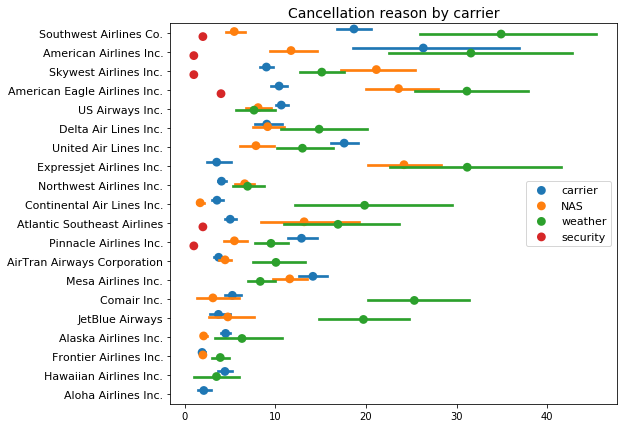

In [5]:
# in order not no show long names in chart, I replace value with long name (just cutting information about merge)
df_2008.replace({'Description':'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'},'US Airways Inc.', inplace=True)

# I replace cancellation code with interpretable names
df_2008.replace({'CancellationCode': {'A': 'carrier', 'B': 'weather', 'C':'NAS', 'D':'security'}}, inplace=True)

# For a following visualization I need to create a new dataframe
d = df_2008.query('Cancelled==1').groupby(['Description', 'Month', 'DayofMonth','CancellationCode'])['Cancelled'].count()
d = pd.DataFrame(data=d)
d.reset_index(inplace=True)
d.head()

plt.figure(figsize = (8,7))
sb.pointplot(data=d, y='Description', x='Cancelled', hue='CancellationCode', 
             order=df_2008['Description'].value_counts().index, linestyles = '', dodge = 0.4)
plt.legend(loc='right', fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('123').set_visible(False)
plt.xlabel('123').set_visible(False)
plt.xticks(fontsize=10)
plt.title('Cancellation reason by carrier', fontsize=14);

## Scheduled flights vs. cancelled flights by carrier
> Total number of flights is much more stable than number of cancelled flights. Cancelled flighs have outliers that are multiple times bigger than regular numbers.


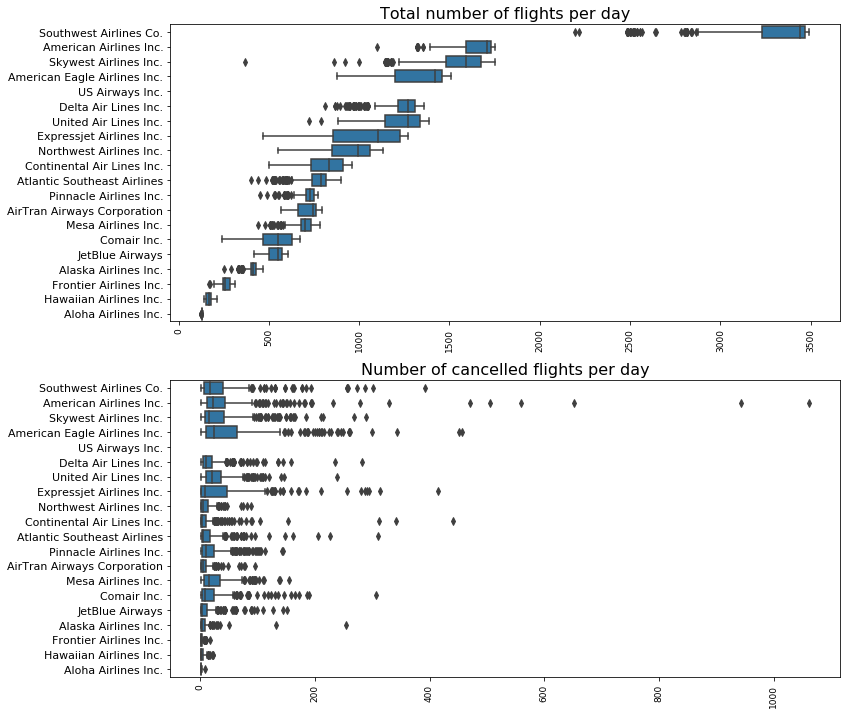

In [6]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sb.boxplot(data=all_flights, x='Flights', y='Description', color = sb.color_palette()[0], order=df_2008['Description'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total number of flights per day', fontsize=16)
plt.ylabel('123').set_visible(False)
plt.xlabel('123').set_visible(False)
plt.yticks(fontsize=11)
plt.xticks(fontsize=9)

plt.subplot(2,1,2)
sb.boxplot(data=cancelled_flights, x='Flights', y='Description', color = sb.color_palette()[0], order=df_2008['Description'].value_counts().index)
plt.xticks(rotation=90);
plt.title('Number of cancelled flights per day', fontsize=16)
plt.ylabel('123').set_visible(False)
plt.xlabel('123').set_visible(False)
plt.yticks(fontsize=11)
plt.xticks(fontsize=9);